<a href="https://colab.research.google.com/github/AlbusDracoSam/Deep-Learning/blob/main/1.Digits%20Recognition/Digits_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [23]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
len(X_train)

60000

In [25]:
len(X_test)

10000

**Two Dimesional shape we can see here. It contains 28 rows and 28 columns.**

In [26]:
X_train[0].shape

(28, 28)

In [27]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Sample Digits**

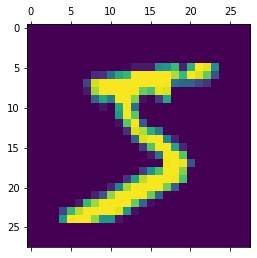

In [28]:
plt.matshow(X_train[0])

**First five digits**

In [29]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

**Reshaping the 28 * 28 matrix into 784 rows and single column value**

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_train = X_train / 255
X_test = X_test / 255

In [32]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [33]:
X_train_flattened.shape

(60000, 784)

**Defining NN**

![picture](https://raw.githubusercontent.com/AlbusDracoSam/Deep-Learning/main/1.Digits%20Recognition/digits_nn.jpg)

In [34]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4617 - accuracy: 0.8812
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9197
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9261


In [35]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.9236


[0.267734169960022, 0.9236000180244446]

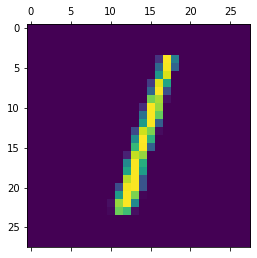

In [36]:
plt.matshow(X_test[2])

In [37]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2]

array([3.05950642e-04, 9.92863655e-01, 6.04541242e-01, 3.30914080e-01,
       2.08728611e-02, 1.00970656e-01, 1.41790330e-01, 1.63558722e-01,
       3.62077653e-01, 4.99365628e-02], dtype=float32)

In [38]:
np.argmax(y_predicted[2])

1

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [41]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    2,    0,    9,    8,    3,    1,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   3,    9,  925,   20,    8,    6,   12,   10,   33,    6],
       [   1,    0,   15,  927,    0,   28,    3,   10,   17,    9],
       [   1,    1,    2,    2,  906,    0,   13,    4,    9,   44],
       [   7,    3,    2,   34,    8,  778,   18,    7,   27,    8],
       [   9,    3,    2,    2,    7,   10,  922,    2,    1,    0],
       [   1,    5,   20,   10,    4,    0,    0,  952,    2,   34],
       [   5,   10,    6,   31,    9,   35,   11,   13,  839,   15],
       [  11,    7,    1,   11,   20,    8,    0,   28,    3,  920]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

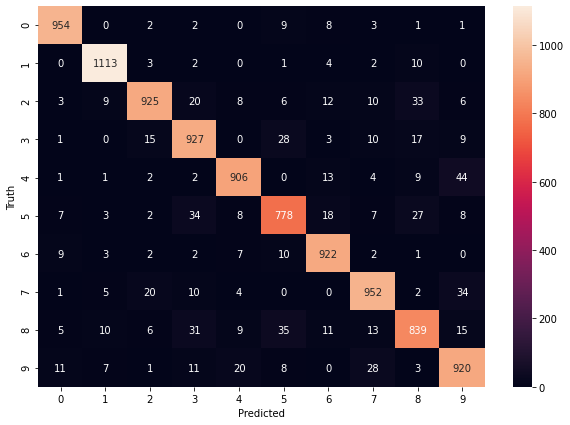

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Using Hidden layer**

In [43]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1241 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0845 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0635 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0508 - accuracy: 0.9842


In [44]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9753


[0.08157192170619965, 0.9753000140190125]

Text(69.0, 0.5, 'Truth')

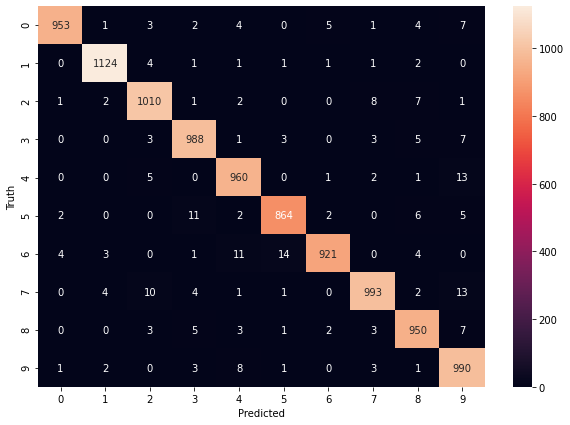

In [46]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Eliminating the flatten operation**

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2789 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1268 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0882 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0663 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9832
